[View in Colaboratory](https://colab.research.google.com/github/JozeeLin/google-tensorflow-exercise/blob/master/logistic_regression.ipynb)

# 逻辑回归(Logistic Regression):计算概率
许多问题需要将概率估算值作为输出。逻辑回归是一种极其高效的概率计算机制。实际上，您可以通过以下两种方式之一使用返回的概率:
- "按原样"
- 转换成二元类别

我们来了解一下如何"按原样"使用概率。假设我们创建一个逻辑回归模型预测狗在半夜发出叫声的概率。我们将此概率称为:

p(bark|night)

如果逻辑回归模型预测p(bark|night)的值为0.05，那么一年内，狗的主人应该被惊醒约18次:

startled = p(bark|night) * nights

在很多情况下，您会将逻辑回归输出映射到二元分类问题的解决方案，该二元分类问题的目标是正确预测两个可能的标签(例如，垃圾邮件分类问题)中的一个。以后的单元会重点介绍这一内容。

逻辑回归模型如何确保输出值始终落在0到1之间。巧合的是，S型函数生成的输出值正好具有这些特性，其定义如下:

$y = \frac{1}{1+e^{-z}}$

如果z表示使用逻辑回归训练的模型的**线性层**的输出,则S型(z)函数会生成一个介于0和1之间的值(概率)。用数学方法表示为:

$y^{'} = \frac{1}{1+e^{-z}}$

其中:
- $y^{'}$是逻辑回归模型针对特定样本的输出
- z是$b+w_1x_1+w_2x_2+\dots+w_Nx_N$
  - w值是该模型学习的权重和偏差
  - x值是特定样本的特征值
  
请注意，z也称为对数几率，因为S型函数的反函数表明，z可定义为标签1的概率除以标签0的概率得出的值得对数:

$z = \log (\frac{y}{1-y})$

### 逻辑回归的损失函数
线性回归的损失函数是平方损失。逻辑回归的损失函数是**对数损失函数**，定义如下:

$\rm{LogLoss} = \sum_{(x,y)\in D} -y\log(y^{'})-(1-y)\log(1-y^{'})$

其中:
- D是包含很多有标签样本的数据集
- y是有标签样本中的标签。由于这是逻辑回归，因此y的每个值必须是0或1
- y是对于特征集x的预测值(介于0和1之间)

对数损失函数的方程式与香农信息论中的熵测量密切相关。它也是似然函数的负对数(假设y属于伯努利分布)。

实际上，最大限度地降低损失函数的值会生成最大的似然估计值。

### 逻辑回归中的正则化
正则化在逻辑回归模型中极其重要。如果没有正则化，逻辑回归的渐进性会不断促使损失在高维度空间内达到0.因此大多数逻辑回归模型会使用以下两个策略之一来降低模型复杂度:
- L2正则化
- 早停法，即，限制训练步数或学习速率
- L1正则化

## 阈值
逻辑回归返回的是概率。为了将逻辑回归值映射到二元类别，需要指定**分类阈值**(也称为**判定阈值**)。如果值高于该阈值，则表示垃圾邮件;如果低于该阈值，则表示"非垃圾邮件"。通常情况下，把阈值设定为0.5。但阈值的设定取决于具体问题，因此你必须对其进行调整。

**注意:调整"逻辑回归的阈值不同于调整学习速率等超参数"。在选择阈值时，需要评估您将因犯错而承担多大的后果。例如，将非垃圾邮件误标记为垃圾邮件会非常糟糕。不过，虽然将垃圾邮件误标记为飞来及邮件会令人不快，但应该不会让你丢掉工作**

# 分类

## 分类:真与假以及正类别与负类别
混淆矩阵

## 分类:准确率
准确率是一个用于评估分类模型的指标。通俗来说，准确率是指我们的模型预测正确的结果所占的比例。正式点说，准确率的定义如下:

$\rm{Accuracy = \frac{Number of correct predictions}{Total number of predictions}}$

对于二元分类，也可以根据正类别和负类别按如下方式计算正确率:

$\rm{Accracy = \frac{TP+TN}{TP+TN+FP+FN}}$

其中，TP=真正例，TN=真负例，FP=假正例，FN=假负例

**注意:当你使用分类不平衡的数据集(比如正类别标签和负类别标签的数量之间存在明显差异)时，单单准确率一项并不能反映全面情况。还有另外两个能够更好的评估分类不平衡问题的指标:准确率和召回率**

## 分类:精确率和召回率
精确率指标尝试回答以下问题：

在被识别为正类别的样本中，确实为正类别的比例是多少?

精确率的定义如下:

$\rm{Precision = \frac{TP}{TP+FP}}$

召回率尝试回答以下问题:

在所有正类别样本中，被正确识别为正类别的比例是多少?

从数学上讲，召回率的定义如下:

$召回率 = \frac{TP}{TP+FN}$

### 精确率和召回率：一场拔河比赛
要全面评估模型的有效性，必须同时检查精确率和召回率。遗憾的是，精确率和召回率往往是此消彼长的情况。也就是说，提高精确率通常会降低召回率值，反之亦然。请观察下图来了解这一概念，该图显示了电子邮件分类模型做出的30项预测。分类阈值右侧的被归类为"垃圾邮件",左侧的则被归类为"非垃圾邮件"。

## 分类:ROC和曲线下面积

### ROC曲线
ROC曲线(接收者操作特征曲线)是一种显示分类模型在所有分类阈值下的效果的图表。该曲线绘制了以下两个参数:
- 真正例率
- 假正例率

**真正例率(TPR)**是召回率的同义词，因此定义如下:

$TPR = \frac{TP}{TP+FN}$

**假正例率(FPR)**的定义如下:

$FPR = \frac{FP}{FP+TN}$

ROC曲线用于绘制采用不同分类阈值时的TPR与FPR。降低分类阈值会导致将更多样本归为正类别，从而增加假正例和真正例的个数。

为了计算ROC曲线上的点，我们可以使用不同的分类阈值多次评估逻辑回归模型，但这样做效率非常低。幸运的是，有一种**基于排序的高效算法**可以为我们提供此类信息，这种算法成为**曲线下面积**。

### 曲线下面积:ROC曲线下面积

**曲线下面积**表示"ROC曲线下面积"。也就是说，曲线下面积测量的是从(0,0)到(1,1)之间整个ROC曲线以下的整个二维面积(参考积分学)。

**曲线下面积对所有可能的分类阈值的效果进行综合衡量**。曲线下面积的一种解读方式是看做模型将某个随机正类别样本排列在某个随机负样本之上的概率。

曲线下面积表示随机正类别样本位于随机负类别样本右侧的概率。

曲线下面积的取值范围为0-1.预测结果100%错误的模型的曲线下面积为0.0；而预测结果100%正确的模型的曲线下面积为1.0 。

曲线下面积因以下两个原因而比较实用:
- 曲线下面积的**尺度不变**。它测量预测的排名情况，而不是测量其绝对值。
- 曲线下面积的**分类阈值不变**。它测量模型预测的质量，而不考虑所选的分类阈值。

不过，这两个原因都有各自的局限性，这可能会导致曲线下面积在某些用例中不太实用：
- 并非总是希望尺度不变。例如，有时我们非常需要被良好校准的概率输出，而曲线下面积无法告诉我们这一结果。
- 并非总是希望分类阈值不变。在假负例与假正例的代价存在较大差异的情况下，尽量减少一种类型的分类错误可能至关重要。例如，在进行来及邮件检测时，可能希望有限考虑尽量减少假正例(即使这会导致假负例大幅增加)。**对于此类优化，曲线下面积并非一个实用的指标**。

## 分类:预测偏差
逻辑回归预测应当无偏差。即:

预测平均值应当约等于观察平均值

**预测偏差**指的是这两个平均值之间的差值。即：

预测偏差 =  预测平均值 - 数据集中相应标签的平均值。

如果出现非常高的非零预测偏差，则说明模型某处存在错误，因为这表明模型正类别标签的出现频率预测有误。

例如，假设我们知道，所有电子邮件中平均有1%的邮件是垃圾邮件。如果我们队某一封给定电子邮件一无所知，则预测它是垃圾邮件的可能性为1%。同样，一个出色的垃圾邮件模型应该预测到电子邮件平均有1%的可能性是垃圾邮件。(换言之，如果我们计算单个电子邮件是来及邮件的预测可能性的平均值，则结果应该是1%)然而，如果该模型预测电子邮件是垃圾邮件平均可能性为20%，那么我们可以得出结论，该模型出现了预测偏差。

造成预测偏差的可能原因包括：

- 特征集不完整
- 数据集混乱
- 模型实现流水线中有错误？
- 训练样本有偏差
- 正则化过强

你可能会通过对学习模型进行后期处理来纠正预测偏差，即通过添加校准层来调整模型的输出，从而减小预测偏差。例如，如果您的模型存在3%以上的偏差，则可以添加一个校准层，将平均预测偏差降低3%。但是，添加校准层并非良策，具体原因如下:
- 修复的是症状，而不是原因
- 你建立了一个更脆弱的系统，并且必须持续更新

如果可能的话，请避免添加校准层。使用校准层的项目往往会对其产生依赖-使用校准层来修复模型的所有错误。最终，维护校准层可能会令人苦不堪言。

**注意：出色模型的偏差通常接近0.即便如此，预测偏差低并不能证明你的模型比较出色。特别糟糕的模型的预测偏差也有可能为0.例如，只能预测所有样本平均值的模型是糟糕的模型，尽管其预测偏差为0**

### 分桶偏差和预测偏差

逻辑回归可预测0到1之间的值。不过，所有带标签样本都正好是0(例如，0表示"非垃圾邮件")或1(例如，1表示"垃圾邮件")。因此，在检查预测偏差时，你无法仅根据一个样本准确地确定预测偏差；而是必须在"一大桶"样本中检查预测偏差。也就是说，只有将足够的样本组合在一起一边能够比较预测值(例如(0.392)与观察值(例如0.394)，逻辑回归的预测偏差才有意义。

你可以通过以下方式构建桶:
- 以线性方式分解目标预测
- 构建分位数

请查看以下某个特定模型的校准曲线。每个点表示包含1000个值得分桶。两个轴具有以下含义：
- x轴表示模型针对该桶预测的平均值
- y轴表示该桶的数据集中的实际平均值

为什么只有模型的某些部分所做的预测如此糟糕？以下是几种可能性:
- 训练集不能充分表示数据空间的某些子集
- 数据集的某些子集比其他子集更混乱
- 该模型过于正则化。(不妨减小lambda的值)


## 逻辑回归

**学习目标：**
- 将房屋价值中位数预测模型重新构建为二元分类模型
- 比较逻辑回归与线性回归解决二元分类问题的有效性

与在之前的练习中一样，我们将使用加利福尼亚州住房数据集，但这次我们会预测某个城市街区的住房成本是否高昂，从而将其转换成一个二元分类问题。此外，我们还会暂时恢复使用默认特征。

### 将问题构建为二元分类问题
数据集的目标是median_house_value,它是一个数值(连续值)特征。我们可以通过向此连续值使用阈值来创建一个布尔值标签。

我们希望通过某个城市街区的特征预测该街区的住房成本是否高昂。为了给训练数据和评估数据准备目标，我们针对房屋价值中位数定义分类阈值-第75百分位数(约为265000)。所有高于此阈值的房屋价值标记为1，其他值标记为0.

In [0]:
import math

from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics
import tensorflow as tf
from tensorflow.python.data import Dataset

tf.logging.set_verbosity(tf.logging.ERROR)
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.1f}'.format

california_housing_dataframe = pd.read_csv("https://storage.googleapis.com/mledu-datasets/california_housing_train.csv", sep=",")

california_housing_dataframe = california_housing_dataframe.reindex(
    np.random.permutation(california_housing_dataframe.index))

注意以下代码与之前练习中的代码之间稍有不同。我们并没有将 median_house_value 用作目标，而是创建了一个新的二元目标 median_house_value_is_high

In [0]:
def preprocess_features(california_housing_dataframe):
  """Prepares input features from California housing data set.

  Args:
    california_housing_dataframe: A Pandas DataFrame expected to contain data
      from the California housing data set.
  Returns:
    A DataFrame that contains the features to be used for the model, including
    synthetic features.
  """
  selected_features = california_housing_dataframe[
    ["latitude",
     "longitude",
     "housing_median_age",
     "total_rooms",
     "total_bedrooms",
     "population",
     "households",
     "median_income"]]
  processed_features = selected_features.copy()
  # Create a synthetic feature.
  processed_features["rooms_per_person"] = (
    california_housing_dataframe["total_rooms"] /
    california_housing_dataframe["population"])
  return processed_features

def preprocess_targets(california_housing_dataframe):
  """Prepares target features (i.e., labels) from California housing data set.

  Args:
    california_housing_dataframe: A Pandas DataFrame expected to contain data
      from the California housing data set.
  Returns:
    A DataFrame that contains the target feature.
  """
  output_targets = pd.DataFrame()
  # Create a boolean categorical feature representing whether the
  # medianHouseValue is above a set threshold.
  output_targets["median_house_value_is_high"] = (
    california_housing_dataframe["median_house_value"] > 265000).astype(float)
  return output_targets

In [4]:
# Choose the first 12000 (out of 17000) examples for training.
training_examples = preprocess_features(california_housing_dataframe.head(12000))
training_targets = preprocess_targets(california_housing_dataframe.head(12000))

# Choose the last 5000 (out of 17000) examples for validation.
validation_examples = preprocess_features(california_housing_dataframe.tail(5000))
validation_targets = preprocess_targets(california_housing_dataframe.tail(5000))

# Double-check that we've done the right thing.
print("Training examples summary:")
display.display(training_examples.describe())
print("Validation examples summary:")
display.display(validation_examples.describe())

print("Training targets summary:")
display.display(training_targets.describe())
print("Validation targets summary:")
display.display(validation_targets.describe())

Training examples summary:


,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_person
count,12000.0,12000.0,12000.0,12000.0,12000.0,12000.0,12000.0,12000.0,12000.0
mean,35.6,-119.6,28.6,2662.8,543.1,1436.4,504.9,3.9,2.0
std,2.1,2.0,12.6,2206.1,426.0,1132.7,388.5,1.9,1.1
min,32.5,-124.3,1.0,8.0,1.0,8.0,1.0,0.5,0.0
25%,33.9,-121.8,18.0,1471.0,298.0,793.0,283.0,2.6,1.5
50%,34.2,-118.5,28.5,2141.0,437.0,1174.0,412.0,3.5,1.9
75%,37.7,-118.0,37.0,3167.2,652.0,1726.0,608.0,4.8,2.3
max,42.0,-114.5,52.0,37937.0,6445.0,28566.0,6082.0,15.0,52.0


Validation examples summary:


,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_person
count,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0
mean,35.6,-119.6,28.6,2597.8,530.5,1413.2,492.3,3.9,2.0
std,2.1,2.0,12.6,2115.3,410.5,1183.3,374.6,1.9,1.2
min,32.6,-124.3,1.0,2.0,2.0,3.0,2.0,0.5,0.1
25%,33.9,-121.8,18.0,1438.0,294.0,780.0,278.0,2.5,1.5
50%,34.2,-118.5,29.0,2103.0,428.0,1155.0,401.0,3.5,1.9
75%,37.7,-118.0,37.0,3107.0,637.0,1710.0,597.0,4.7,2.3
max,41.9,-114.3,52.0,28258.0,4819.0,35682.0,4769.0,15.0,55.2


Training targets summary:


,median_house_value_is_high
count,12000.0
mean,0.3
std,0.4
min,0.0
25%,0.0
50%,0.0
75%,1.0
max,1.0


Validation targets summary:


,median_house_value_is_high
count,5000.0
mean,0.2
std,0.4
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,1.0


 ## 线性回归会有怎样的表现？
为了解逻辑回归为什么有效，我们首先训练一个使用线性回归的简单模型。该模型将使用 `{0, 1}` 中的值为标签，并尝试预测一个尽可能接近 `0` 或 `1` 的连续值。此外，我们希望将输出解读为概率，所以最好模型的输出值可以位于 `(0, 1)` 范围内。然后我们会应用阈值 `0.5`，以确定标签。

运行以下单元格，以使用 [LinearRegressor](https://www.tensorflow.org/api_docs/python/tf/contrib/learn/LinearRegressor) 训练线性回归模型。

In [0]:
def construct_feature_columns(input_features):
  """Construct the TensorFlow Feature Columns.

  Args:
    input_features: The names of the numerical input features to use.
  Returns:
    A set of feature columns
  """
  return set([tf.feature_column.numeric_column(my_feature)
              for my_feature in input_features])

In [0]:
def my_input_fn(features, targets, batch_size=1, shuffle=True, num_epochs=None):
    """Trains a linear regression model of one feature.
  
    Args:
      features: pandas DataFrame of features
      targets: pandas DataFrame of targets
      batch_size: Size of batches to be passed to the model
      shuffle: True or False. Whether to shuffle the data.
      num_epochs: Number of epochs for which data should be repeated. None = repeat indefinitely
    Returns:
      Tuple of (features, labels) for next data batch
    """
    
    # Convert pandas data into a dict of np arrays.
    features = {key:np.array(value) for key,value in dict(features).items()}                                            
 
    # Construct a dataset, and configure batching/repeating
    ds = Dataset.from_tensor_slices((features,targets)) # warning: 2GB limit
    ds = ds.batch(batch_size).repeat(num_epochs)
    
    # Shuffle the data, if specified
    if shuffle:
      ds = ds.shuffle(10000)
    
    # Return the next batch of data
    features, labels = ds.make_one_shot_iterator().get_next()
    return features, labels

In [0]:
def train_linear_regressor_model(
    learning_rate,
    steps,
    batch_size,
    training_examples,
    training_targets,
    validation_examples,
    validation_targets):
  """Trains a linear regression model.
  
  In addition to training, this function also prints training progress information,
  as well as a plot of the training and validation loss over time.
  
  Args:
    learning_rate: A `float`, the learning rate.
    steps: A non-zero `int`, the total number of training steps. A training step
      consists of a forward and backward pass using a single batch.
    batch_size: A non-zero `int`, the batch size.
    training_examples: A `DataFrame` containing one or more columns from
      `california_housing_dataframe` to use as input features for training.
    training_targets: A `DataFrame` containing exactly one column from
      `california_housing_dataframe` to use as target for training.
    validation_examples: A `DataFrame` containing one or more columns from
      `california_housing_dataframe` to use as input features for validation.
    validation_targets: A `DataFrame` containing exactly one column from
      `california_housing_dataframe` to use as target for validation.
      
  Returns:
    A `LinearRegressor` object trained on the training data.
  """

  periods = 10
  steps_per_period = steps / periods

  # Create a linear regressor object.
  my_optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
  my_optimizer = tf.contrib.estimator.clip_gradients_by_norm(my_optimizer, 5.0)
  linear_regressor = tf.estimator.LinearRegressor(
      feature_columns=construct_feature_columns(training_examples),
      optimizer=my_optimizer
  )
    
  # Create input functions  
  training_input_fn = lambda: my_input_fn(training_examples, 
                                          training_targets["median_house_value_is_high"], 
                                          batch_size=batch_size)
  predict_training_input_fn = lambda: my_input_fn(training_examples, 
                                                  training_targets["median_house_value_is_high"], 
                                                  num_epochs=1, 
                                                  shuffle=False)
  predict_validation_input_fn = lambda: my_input_fn(validation_examples, 
                                                    validation_targets["median_house_value_is_high"], 
                                                    num_epochs=1, 
                                                    shuffle=False)

  # Train the model, but do so inside a loop so that we can periodically assess
  # loss metrics.
  print("Training model...")
  print("RMSE (on training data):")
  training_rmse = []
  validation_rmse = []
  for period in range (0, periods):
    # Train the model, starting from the prior state.
    linear_regressor.train(
        input_fn=training_input_fn,
        steps=steps_per_period
    )
    
    # Take a break and compute predictions.
    training_predictions = linear_regressor.predict(input_fn=predict_training_input_fn)
    training_predictions = np.array([item['predictions'][0] for item in training_predictions])
    
    validation_predictions = linear_regressor.predict(input_fn=predict_validation_input_fn)
    validation_predictions = np.array([item['predictions'][0] for item in validation_predictions])
    
    # Compute training and validation loss.
    training_root_mean_squared_error = math.sqrt(
        metrics.mean_squared_error(training_predictions, training_targets))
    validation_root_mean_squared_error = math.sqrt(
        metrics.mean_squared_error(validation_predictions, validation_targets))
    # Occasionally print the current loss.
    print("  period %02d : %0.2f" % (period, training_root_mean_squared_error))
    # Add the loss metrics from this period to our list.
    training_rmse.append(training_root_mean_squared_error)
    validation_rmse.append(validation_root_mean_squared_error)
  print("Model training finished.")
  
  # Output a graph of loss metrics over periods.
  plt.ylabel("RMSE")
  plt.xlabel("Periods")
  plt.title("Root Mean Squared Error vs. Periods")
  plt.tight_layout()
  plt.plot(training_rmse, label="training")
  plt.plot(validation_rmse, label="validation")
  plt.legend()

  return linear_regressor

Training model...
RMSE (on training data):
  period 00 : 0.46
  period 01 : 0.45
  period 02 : 0.47
  period 03 : 0.44
  period 04 : 0.44
  period 05 : 0.45
  period 06 : 0.44
  period 07 : 0.44
  period 08 : 0.44
  period 09 : 0.44
Model training finished.


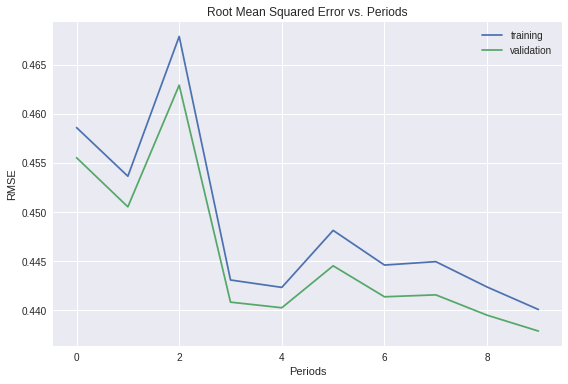

In [8]:
linear_regressor = train_linear_regressor_model(
    learning_rate=0.000001,
    steps=200,
    batch_size=20,
    training_examples=training_examples,
    training_targets=training_targets,
    validation_examples=validation_examples,
    validation_targets=validation_targets)

 ## 任务 1：我们可以计算这些预测的对数损失函数吗？

**检查预测，并确定是否可以使用它们来计算对数损失函数。**

`LinearRegressor` 使用的是 L2 损失，在将输出解读为概率时，它并不能有效地惩罚误分类。例如，对于概率分别为 0.9 和 0.9999 的负分类样本是否被分类为正分类，二者之间的差异应该很大，但 L2 损失并不会明显区分这些情况。

相比之下，`LogLoss`（对数损失函数）对这些"置信错误"的惩罚力度更大。请注意，`LogLoss` 的定义如下：

$$Log Loss = \sum_{(x,y)\in D} -y \cdot log(y_{pred}) - (1 - y) \cdot log(1 - y_{pred})$$


但我们首先需要获得预测值。我们可以使用 `LinearRegressor.predict` 获得预测值。

我们可以使用预测和相应目标计算 `LogLoss` 吗？

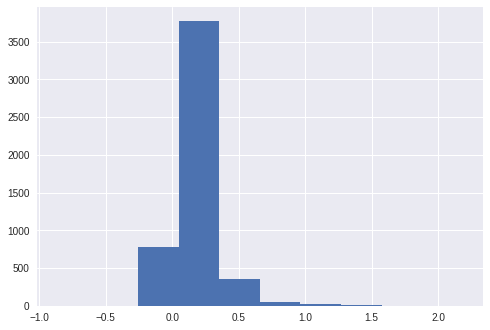

In [9]:
predict_validation_input_fn = lambda: my_input_fn(validation_examples, 
                                                  validation_targets["median_house_value_is_high"], 
                                                  num_epochs=1, 
                                                  shuffle=False)

validation_predictions = linear_regressor.predict(input_fn=predict_validation_input_fn)
validation_predictions = np.array([item['predictions'][0] for item in validation_predictions])

_ = plt.hist(validation_predictions)

 ## 任务 2：训练逻辑回归模型并计算验证集的对数损失函数

要使用逻辑回归非常简单，用 [LinearClassifier](https://www.tensorflow.org/api_docs/python/tf/estimator/LinearClassifier) 替代 `LinearRegressor` 即可。完成以下代码。

**注意**：在 `LinearClassifier` 模型上运行 `train()` 和 `predict()` 时，您可以通过返回的字典（例如 `predictions["probabilities"]`）中的 `"probabilities"` 键获取实值预测概率。Sklearn 的 [log_loss](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss.html) 函数可基于这些概率计算对数损失函数，非常方便。


In [0]:
def train_linear_classifier_model(
    learning_rate,
    steps,
    batch_size,
    training_examples,
    training_targets,
    validation_examples,
    validation_targets):
  """Trains a linear regression model of one feature.
  
  In addition to training, this function also prints training progress information,
  as well as a plot of the training and validation loss over time.
  
  Args:
    learning_rate: A `float`, the learning rate.
    steps: A non-zero `int`, the total number of training steps. A training step
      consists of a forward and backward pass using a single batch.
    batch_size: A non-zero `int`, the batch size.
    training_examples: A `DataFrame` containing one or more columns from
      `california_housing_dataframe` to use as input features for training.
    training_targets: A `DataFrame` containing exactly one column from
      `california_housing_dataframe` to use as target for training.
    validation_examples: A `DataFrame` containing one or more columns from
      `california_housing_dataframe` to use as input features for validation.
    validation_targets: A `DataFrame` containing exactly one column from
      `california_housing_dataframe` to use as target for validation.
      
  Returns:
    A `LinearClassifier` object trained on the training data.
  """

  periods = 10
  steps_per_period = steps / periods
  
  # Create a linear classifier object.
  my_optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
  my_optimizer = tf.contrib.estimator.clip_gradients_by_norm(my_optimizer, 5.0)  
  linear_classifier = tf.estimator.LinearClassifier(
      feature_columns=construct_feature_columns(training_examples),
      optimizer=my_optimizer
  )
  
  # Create input functions
  training_input_fn = lambda: my_input_fn(training_examples, 
                                          training_targets["median_house_value_is_high"], 
                                          batch_size=batch_size)
  predict_training_input_fn = lambda: my_input_fn(training_examples, 
                                                  training_targets["median_house_value_is_high"], 
                                                  num_epochs=1, 
                                                  shuffle=False)
  predict_validation_input_fn = lambda: my_input_fn(validation_examples, 
                                                    validation_targets["median_house_value_is_high"], 
                                                    num_epochs=1, 
                                                    shuffle=False)
  
  # Train the model, but do so inside a loop so that we can periodically assess
  # loss metrics.
  print("Training model...")
  print("LogLoss (on training data):")
  training_log_losses = []
  validation_log_losses = []
  for period in range (0, periods):
    # Train the model, starting from the prior state.
    linear_classifier.train(
        input_fn=training_input_fn,
        steps=steps_per_period
    )
    # Take a break and compute predictions.    
    training_probabilities = linear_classifier.predict(input_fn=predict_training_input_fn)
    training_probabilities = np.array([item['probabilities'] for item in training_probabilities])
    
    validation_probabilities = linear_classifier.predict(input_fn=predict_validation_input_fn)
    validation_probabilities = np.array([item['probabilities'] for item in validation_probabilities])
    
    training_log_loss = metrics.log_loss(training_targets, training_probabilities)
    validation_log_loss = metrics.log_loss(validation_targets, validation_probabilities)
    # Occasionally print the current loss.
    print("  period %02d : %0.2f" % (period, training_log_loss))
    # Add the loss metrics from this period to our list.
    training_log_losses.append(training_log_loss)
    validation_log_losses.append(validation_log_loss)
  print("Model training finished.")
  
  # Output a graph of loss metrics over periods.
  plt.ylabel("LogLoss")
  plt.xlabel("Periods")
  plt.title("LogLoss vs. Periods")
  plt.tight_layout()
  plt.plot(training_log_losses, label="training")
  plt.plot(validation_log_losses, label="validation")
  plt.legend()

  return linear_classifier

Training model...
LogLoss (on training data):
  period 00 : 0.59
  period 01 : 0.58
  period 02 : 0.57
  period 03 : 0.55
  period 04 : 0.55
  period 05 : 0.54
  period 06 : 0.54
  period 07 : 0.53
  period 08 : 0.54
  period 09 : 0.53
Model training finished.


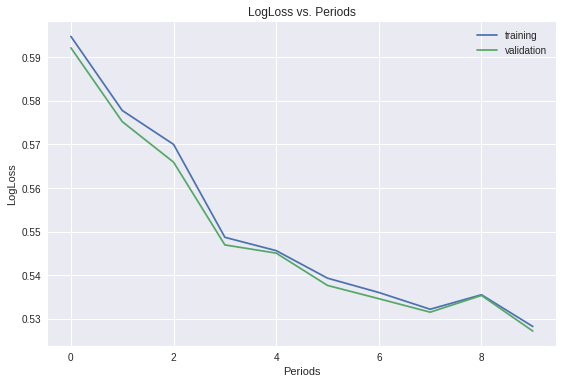

In [13]:
linear_classifier = train_linear_classifier_model(
    learning_rate=0.000005,
    steps=500,
    batch_size=20,
    training_examples=training_examples,
    training_targets=training_targets,
    validation_examples=validation_examples,
    validation_targets=validation_targets)

 ## 任务 3：计算准确率并为验证集绘制 ROC 曲线

分类时非常有用的一些指标包括：模型[准确率](https://en.wikipedia.org/wiki/Accuracy_and_precision#In_binary_classification)、[ROC 曲线](https://en.wikipedia.org/wiki/Receiver_operating_characteristic)和 ROC 曲线下面积 (AUC)。我们会检查这些指标。

`LinearClassifier.evaluate` 可计算准确率和 AUC 等实用指标。

In [14]:
evaluation_metrics = linear_classifier.evaluate(input_fn=predict_validation_input_fn)

print("AUC on the validation set: %0.2f" % evaluation_metrics['auc'])
print("Accuracy on the validation set: %0.2f" % evaluation_metrics['accuracy'])

AUC on the validation set: 0.73
Accuracy on the validation set: 0.76


 您可以使用类别概率（例如由 `LinearClassifier.predict` 
和 Sklearn 的 [roc_curve](http://scikit-learn.org/stable/modules/model_evaluation.html#roc-metrics) 计算的概率）来获得绘制 ROC 曲线所需的真正例率和假正例率。

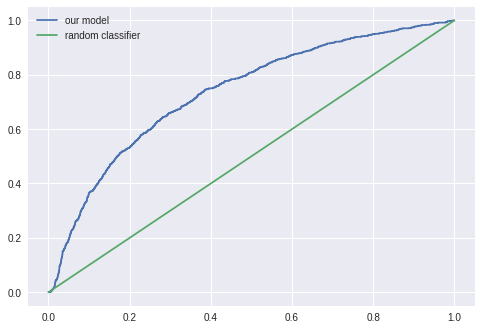

In [15]:
validation_probabilities = linear_classifier.predict(input_fn=predict_validation_input_fn)
# Get just the probabilities for the positive class
validation_probabilities = np.array([item['probabilities'][1] for item in validation_probabilities])

false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(
    validation_targets, validation_probabilities)
plt.plot(false_positive_rate, true_positive_rate, label="our model")
plt.plot([0, 1], [0, 1], label="random classifier")
_ = plt.legend(loc=2)

 **看看您是否可以调整任务 2 中训练的模型的学习设置，以改善 AUC。**

通常情况下，某些指标在提升的同时会损害其他指标，因此您需要找到可以实现理想折中情况的设置。

**验证所有指标是否同时有所提升。**

Training model...
LogLoss (on training data):
  period 00 : 0.60
  period 01 : 0.58
  period 02 : 0.57
  period 03 : 0.56
  period 04 : 0.55
  period 05 : 0.54
  period 06 : 0.54
  period 07 : 0.53
  period 08 : 0.53
  period 09 : 0.53
Model training finished.
AUC on the validation set: 0.73
Accuracy on the validation set: 0.76


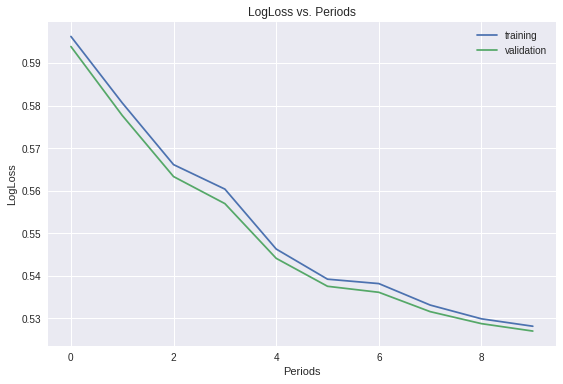

In [16]:
# TUNE THE SETTINGS BELOW TO IMPROVE AUC
linear_classifier = train_linear_classifier_model(
    learning_rate=0.000005,
    steps=500,
    batch_size=20,
    training_examples=training_examples,
    training_targets=training_targets,
    validation_examples=validation_examples,
    validation_targets=validation_targets)

evaluation_metrics = linear_classifier.evaluate(input_fn=predict_validation_input_fn)

print("AUC on the validation set: %0.2f" % evaluation_metrics['auc'])
print("Accuracy on the validation set: %0.2f" % evaluation_metrics['accuracy'])

 一个可能有用的解决方案是，只要不过拟合，就训练更长时间。

要做到这一点，我们可以增加步数和/或批量大小。

所有指标同时提升，这样，我们的损失指标就可以很好地代理 AUC 和准确率了。

注意它是如何进行很多很多次迭代，只是为了再尽量增加一点 AUC。这种情况很常见，但通常情况下，即使只有一点小小的收获，投入的成本也是值得的。

Training model...
LogLoss (on training data):
  period 00 : 0.50
  period 01 : 0.49
  period 02 : 0.48
  period 03 : 0.48
  period 04 : 0.47
  period 05 : 0.47
  period 06 : 0.47
  period 07 : 0.47
  period 08 : 0.47
  period 09 : 0.47
Model training finished.
AUC on the validation set: 0.81
Accuracy on the validation set: 0.78


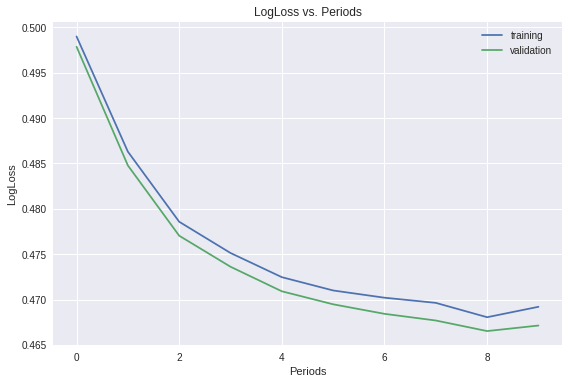

In [17]:
linear_classifier = train_linear_classifier_model(
    learning_rate=0.000003,
    steps=20000,
    batch_size=500,
    training_examples=training_examples,
    training_targets=training_targets,
    validation_examples=validation_examples,
    validation_targets=validation_targets)

evaluation_metrics = linear_classifier.evaluate(input_fn=predict_validation_input_fn)

print("AUC on the validation set: %0.2f" % evaluation_metrics['auc'])
print("Accuracy on the validation set: %0.2f" % evaluation_metrics['accuracy'])